In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [2]:
print('Image DataShape', digits.data.shape)
print("label DataShape", digits.target.shape)

Image DataShape (1797, 64)
label DataShape (1797,)


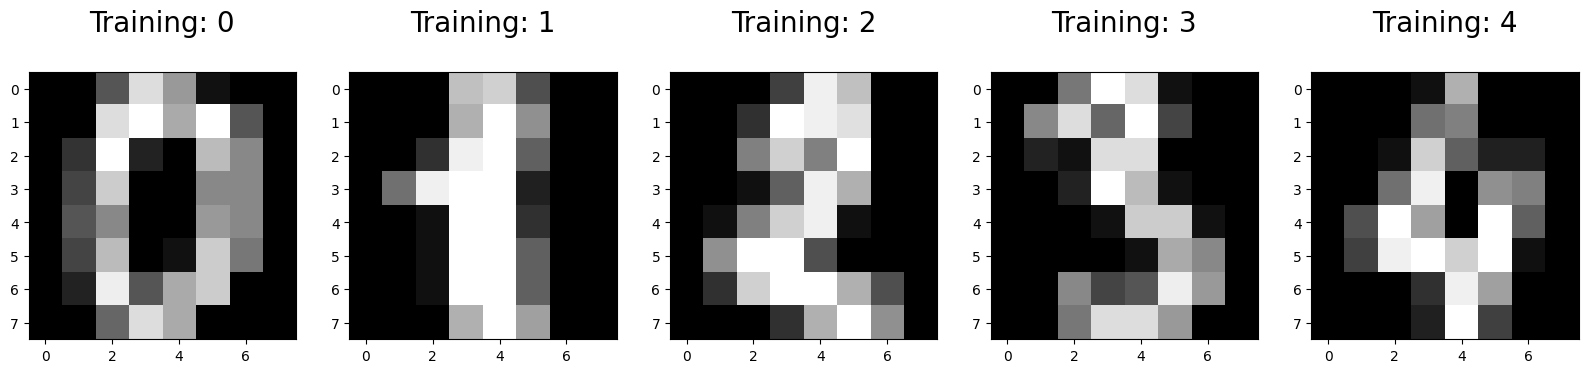

In [5]:
plt.figure(figsize = (20, 4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.23, random_state = 42)


In [10]:
print(x_train.shape)

(1383, 64)


In [11]:
print(x_test.shape)

(414, 64)


In [12]:
print(y_train.shape)

(1383,)


In [13]:
print(y_test.shape)

(414,)


In [14]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()

In [15]:
regressor.fit(x_train,y_train)

C:\Users\gkris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Predict for one observation (image)**

In [18]:
print(regressor.predict(x_test[0].reshape(1, -1)))

[6]


In [20]:
regressor.predict(x_test[0:10])

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2])

In [21]:
predictions = regressor.predict(x_test)
score = regressor.score(x_test, y_test)

In [22]:
print(score)

0.9734299516908212


In [23]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[40  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  1 35  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  1  0  0  0  0]
 [ 0  1  0  0 52  0  1  0  0  0]
 [ 0  0  0  0  0 50  1  0  0  1]
 [ 0  0  0  0  0  1 39  0  0  0]
 [ 0  0  0  0  0  1  0 36  0  0]
 [ 0  0  0  0  0  1  0  0 36  0]
 [ 0  0  0  1  0  0  0  0  1 41]]


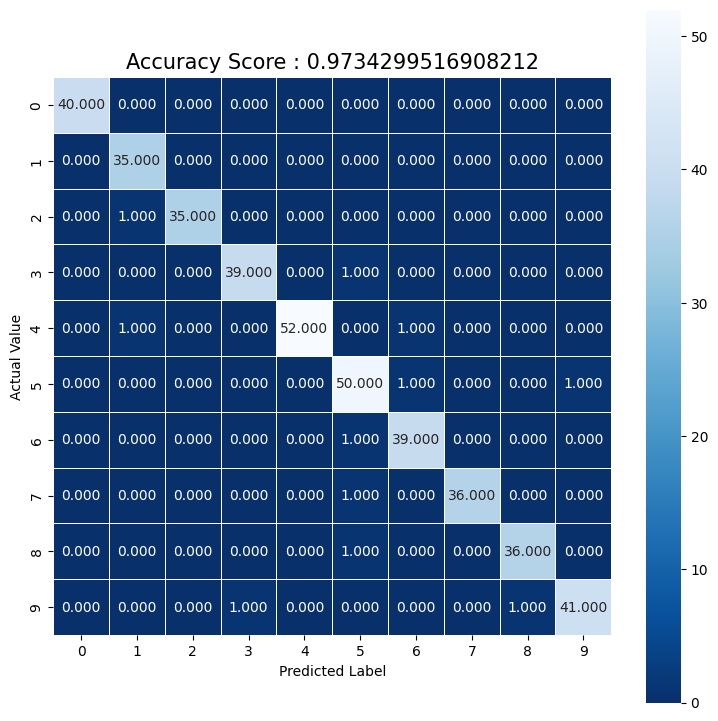

In [25]:
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot = True, fmt = ".3f", linewidth = .5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score : {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [26]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index += 1

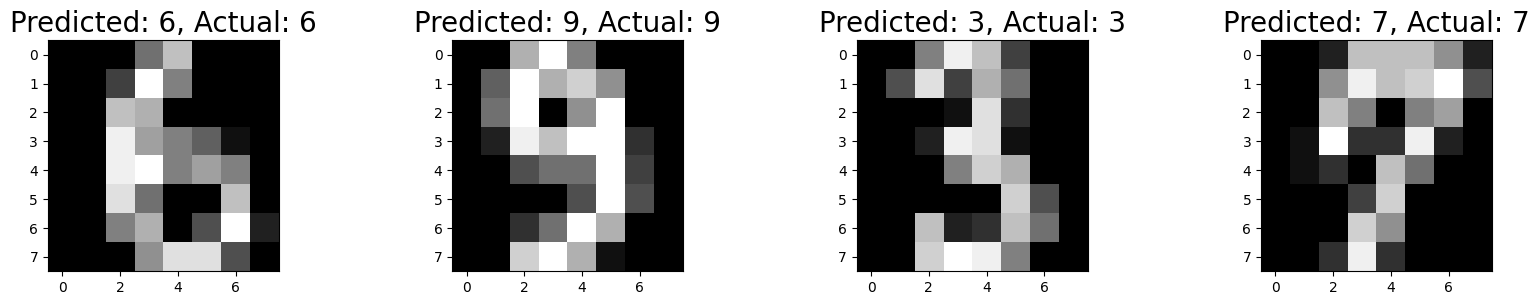

In [27]:
plt.figure(figsize = (20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1, 4, plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap = plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong]), fontsize = 20)